# Rain-runoff model

Supplementary to this notebook:
- `Functions.py`
- `precipitation.csv`

In [1]:
from Functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 1. Load data

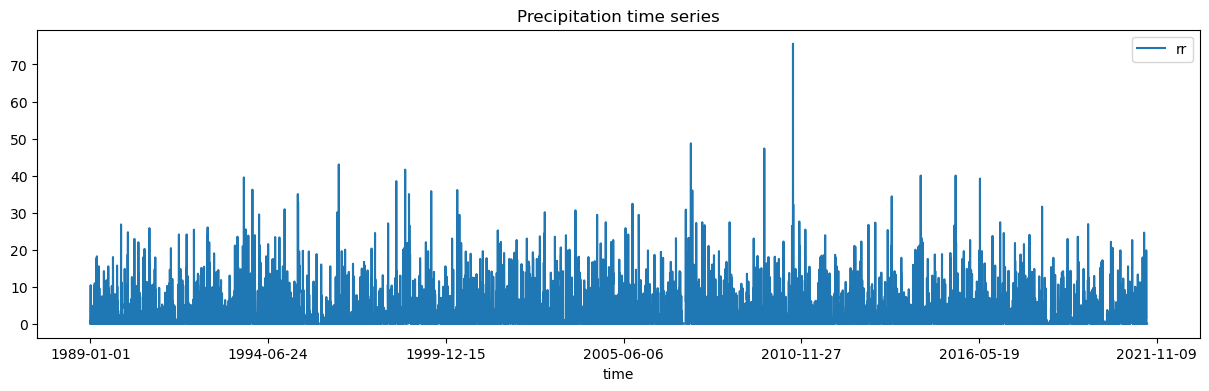

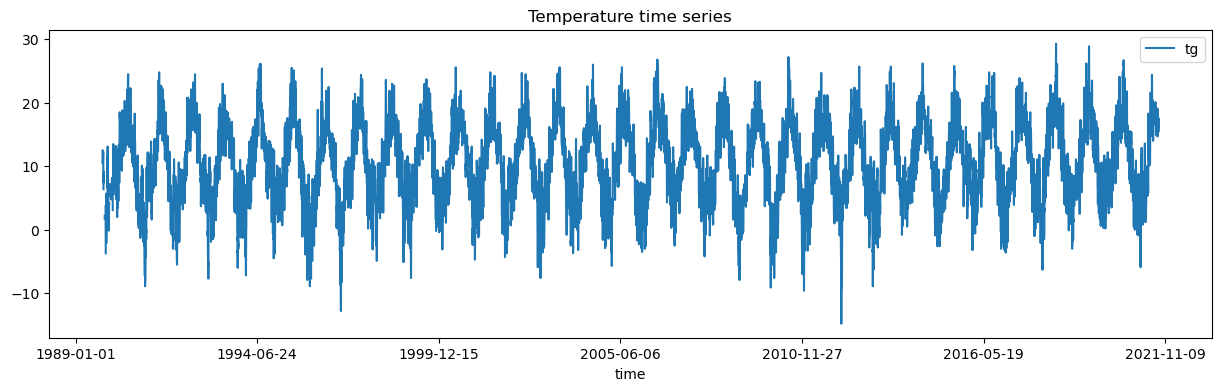

,time,rr,tg
0,1989-01-01,0.0,NaN
1,1989-01-02,0.0,NaN
2,1989-01-03,0.0,NaN
3,1989-01-04,4.4,NaN
4,1989-01-05,10.4,NaN


In [2]:
df_precipitation = pd.read_csv('data/precipitation.csv')
df_temperature = pd.read_csv('data/temperature.csv')

df = df_precipitation.merge(df_temperature, on='time')

df.plot(x='time', y='rr', figsize=(15,4), title='Precipitation time series');
df.plot(x='time', y='tg', figsize=(15,4), title='Temperature time series');
plt.show()

display(df.head())

## 2. Initialisation of the model

In [3]:
P_obs = df['rr'].fillna(0).values        # in mm/day
T_obs = df['tg'].fillna(0).values     # in °C
#Q_obs = df['discharge'].values 


# --- 3. RUN THE MODEL ---
# Define parameters (These are the ones you will eventually calibrate with MCMC)
k_runoff_guess = 0.05   # Slow release
c_pet_guess = 0.1       # Evaporation factor
T_base_guess = 0.0
s_init_guess = 10.0
area_catchment = 50.0  # in km2 (example)

# Initialize
# model = TempBucketRR(k_runoff_guess, c_pet_guess, T_base_guess, s_init_guess, area_km2=area_catchment)
model = TempBucketRR(k_runoff_guess, c_pet_guess, T_base_guess, s_init_guess)

# Run
# Q_sim_mm, Q_sim_m3s, S_sim, PET_sim, AET_sim = model.run(P_obs, T_obs)
Q_sim_mm, S_sim, PET_sim, AET_sim = model.run(P_obs, T_obs)



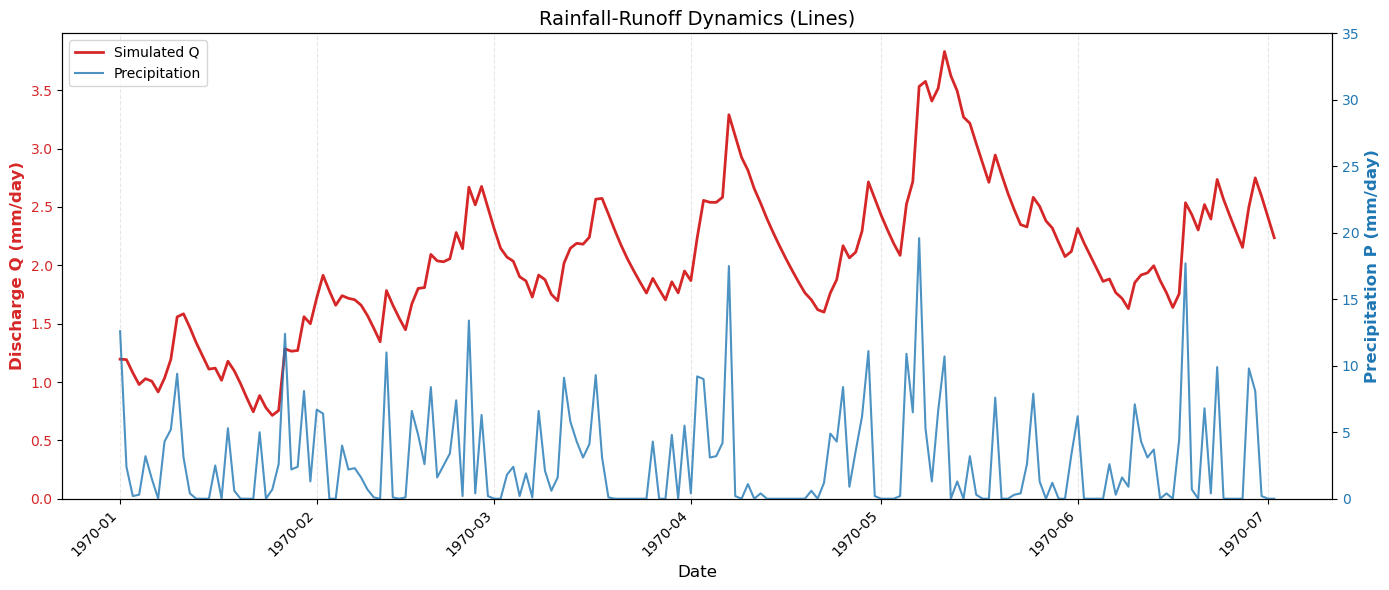

In [6]:
# --- SETUP (Same as before) ---
# Assuming 'df', 'P_obs', and 'Q_sim' are already loaded from your previous steps
# Optional: Zoom in on a specific period if you have 50+ years of data
start_date = '2000-10-01'
end_date = '2001-04-01'

if 'start_date' in locals() and start_date:
    mask = (df['time'] >= start_date) & (df['time'] <= end_date)
    plot_time = df.loc[mask, 'time']
    plot_P = P_obs[mask]
    plot_Q = Q_sim_mm[mask]
else:
    plot_time = df['time']
    plot_P = P_obs
    plot_Q = Q_sim_mm

# --- PLOT GENERATION ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# 1. AXIS 1 (Left): Discharge (Red Line)
color_q = '#D62728'  # Red
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Discharge Q (mm/day)', color=color_q, fontsize=12, fontweight='bold')
ax1.plot(plot_time, plot_Q, color=color_q, linewidth=2, label='Simulated Q')
ax1.tick_params(axis='y', labelcolor=color_q)
ax1.grid(True, which='major', axis='x', alpha=0.3, linestyle='--')
ax1.set_ylim(bottom=0)

# 2. AXIS 2 (Right): Precipitation (Blue Line, NOT inverted)
ax2 = ax1.twinx()
color_p = '#1F77B4' # Blue
ax2.set_ylabel('Precipitation P (mm/day)', color=color_p, fontsize=12, fontweight='bold')

# Plot as LINE instead of BAR
ax2.plot(plot_time, plot_P, color=color_p, linewidth=1.5, linestyle='-', alpha=0.8, label='Precipitation')
ax2.tick_params(axis='y', labelcolor=color_p)

# --- SCALING ---
# Set the Precipitation scale to max 35 as requested
ax2.set_ylim(0, 35)

# --- LEGEND ---
# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# --- FORMATTING ---
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.title('Rainfall-Runoff Dynamics (Lines)', fontsize=14)
plt.tight_layout()
plt.show()